In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

4422102/4422102 [==============================] - 1s 0us/step
x_train.shape: (60000, 28, 28)


In [4]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [7]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 198s 104ms/step - loss: 0.1751 - accuracy: 0.9332 - val_loss: 0.3086 - val_accuracy: 0.9035
Epoch 2/15
1875/1875 [==============================] - 185s 98ms/step - loss: 0.1622 - accuracy: 0.9376 - val_loss: 0.3231 - val_accuracy: 0.8997
Epoch 3/15
1875/1875 [==============================] - 167s 89ms/step - loss: 0.1529 - accuracy: 0.9421 - val_loss: 0.3424 - val_accuracy: 0.8921
Epoch 4/15
1875/1875 [==============================] - 181s 96ms/step - loss: 0.1439 - accuracy: 0.9446 - val_loss: 0.3520 - val_accuracy: 0.8957
Epoch 5/15
1875/1875 [==============================] - 181s 96ms/step - loss: 0.1378 - accuracy: 0.9472 - val_loss: 0.3428 - val_accuracy: 0.9017
Epoch 6/15
1875/1875 [==============================] - 186s 99ms/step - loss: 0.1293 - accuracy: 0.9512 - val_loss: 0.3534 - val_accuracy: 0.9012
Epoch 7/15
1875/1875 [==============================] - 198s 105ms/step - loss: 0.1222 - accuracy: 0.9537 - val_loss:

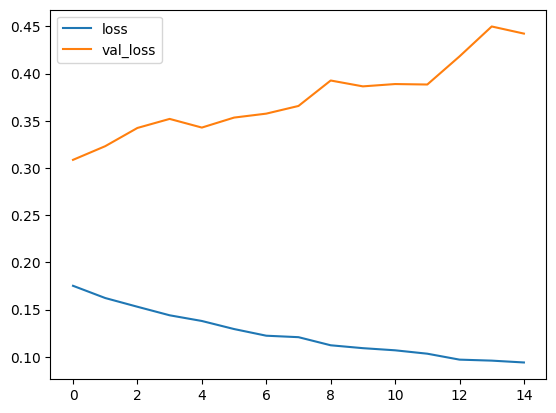

In [10]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

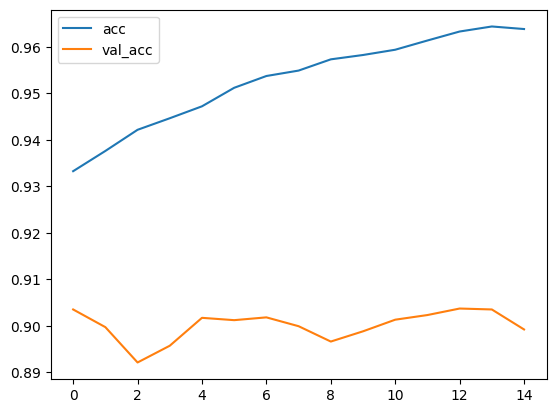

In [11]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 4s 11ms/step
Confusion matrix, without normalization
[[874   0  17  20   3   1  80   0   5   0]
 [  3 981   1  10   2   0   1   0   2   0]
 [ 28   0 867  10  37   0  56   0   2   0]
 [ 20   3  16 908  28   0  24   0   1   0]
 [  2   1  76  28 802   0  87   0   4   0]
 [  0   0   0   0   0 960   1  23   5  11]
 [130   0  77  22  66   1 692   0  12   0]
 [  0   0   0   0   0   5   0 975   0  20]
 [  7   1   6   3   1   1   7   1 972   1]
 [  1   0   0   0   0   4   0  34   0 961]]


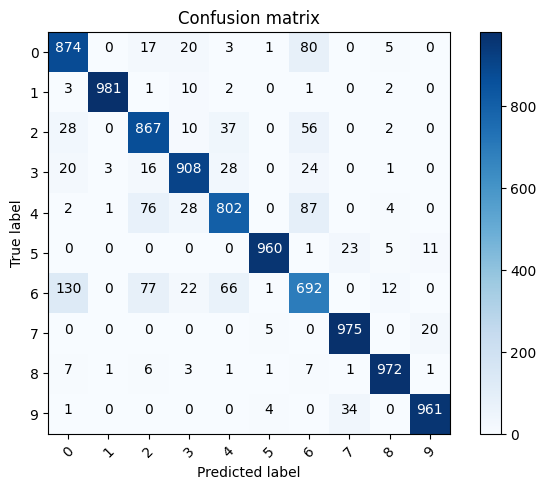

In [13]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [14]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

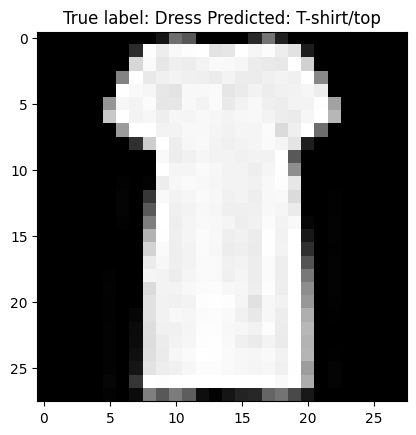

In [20]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));